In [7]:
import math
import numpy as np
import matplotlib.pyplot as plt
import sys

# Allows me to import my modules
sys.path.append('../../modules')

# The python definition of f(x) for problem 1.
from problem_function import f as fitness_function

In [6]:
def encode_dna(solution):
    dna = []
    remainder = abs(round(solution, 3)*1000)
    
    # Take each digit in the form: abc.def and put into list as ["f", "e", "d", ".", "c", "b", "a"]
    for i in range(6):
        part = remainder % 10**(i+1)
        digit = int(part * 10**(-i))
        dna.append(str(digit))
        if (i == 2):
            dna.append('.')
        remainder -= part
    
    # Reverse list order
    dna = dna[::-1]
    
    # Append '+' or '-' to list
    prefix = ['+']
    if (solution < 0):
        prefix = ['-']
    prefix.extend(dna)
    dna = prefix
    
    # Return list of form: ["s", "a", "b", "c", "d", "e", "f"]    (where s is the sign)
    return dna
    
def decode_dna(dna):
    return float("".join(dna))

In [8]:
# Test that I can encode and decode a value to get the same value out (to 6 SF & 3 DP).
dna = encode_dna(3.148787)
print("DNA: {}".format(dna))
solution = decode_dna(dna)
print("Solution: {}".format(solution))

DNA: ['+', '0', '0', '3', '.', '1', '4', '9']
Solution: 3.149


In [55]:
import random

# Default values for mutate_dna parameters
MUTATION_CHANCE = 0.1
SIGN_CHANGE_CHANCE = 0.05
sign_change_dictionary = {"-": "+", "+": "-"}

def mutate_dna(dna, chance = None, sign_change_chance = None):
    # Set defaults if parameter not provided
    chance = MUTATION_CHANCE if chance is None else chance
    sign_change_chance = SIGN_CHANGE_CHANCE if sign_change_chance is None else sign_change_chance
    
    # Chance of a change of sign
    if (random.random() <= sign_change_chance):
            dna[0] = sign_change_dictionary[dna[0]]
    
    # For each digit
    for d in [1, 2, 3, 5, 6, 7]:
        # There is a chance for it to change to a random number
        if (random.random() <= chance):
            dna[d] = str(random.randrange(0, 9))
            
    return dna

In [58]:
dna = encode_dna(200.000)
for i in range(100):
    dna = mutate_dna(dna, 0.05, 0.01)
    print(dna)


['+', '2', '0', '0', '.', '0', '6', '0']
['+', '2', '0', '0', '.', '0', '6', '0']
['+', '2', '0', '0', '.', '0', '6', '0']
['+', '2', '0', '0', '.', '0', '6', '3']
['+', '2', '0', '5', '.', '0', '6', '7']
['+', '2', '0', '5', '.', '0', '6', '7']
['+', '2', '0', '5', '.', '0', '6', '7']
['+', '1', '0', '5', '.', '0', '6', '7']
['+', '1', '0', '5', '.', '0', '6', '7']
['+', '1', '0', '5', '.', '0', '6', '7']
['+', '1', '0', '5', '.', '0', '6', '7']
['+', '7', '0', '5', '.', '0', '0', '7']
['+', '7', '0', '5', '.', '2', '0', '7']
['+', '7', '0', '5', '.', '2', '0', '7']
['+', '7', '0', '5', '.', '7', '0', '7']
['+', '7', '0', '5', '.', '7', '0', '7']
['+', '7', '0', '5', '.', '7', '0', '7']
['+', '7', '0', '3', '.', '7', '0', '7']
['+', '7', '0', '3', '.', '7', '0', '7']
['+', '7', '0', '6', '.', '7', '0', '7']
['+', '7', '0', '6', '.', '7', '0', '7']
['+', '7', '3', '6', '.', '7', '0', '7']
['+', '7', '3', '6', '.', '7', '3', '7']
['+', '7', '3', '6', '.', '7', '3', '7']
['+', '7', '3', 

In [11]:
decode_dna(dna)

400.08

In [12]:
def cross_over(dna1, dna2, cross_over_amount):
    resultant_dna = []
    templates = (dna1, dna2)
    current_template = random.randrange(0, 1)
    cross_over_points = set([random.randrange(0, 7) for i in range(cross_over_amount)])
    while (len(cross_over_points) != cross_over_amount):
        cross_over_points.add(random.randrange(0, 7))
    for i in range(8):
        if i in cross_over_points:
            current_template += 1
            current_template %= 2
        resultant_dna.append(templates[current_template][i])
        
    return resultant_dna

In [13]:
cross_over(encode_dna(111.111), encode_dna(-222.222), 4)

['-', '1', '1', '1', '.', '1', '1', '1']

In [14]:
class individual:
    def __init__(self, dna=None, gen=None):
        # If no dna is provided, generate dna from encoding a random float; with a random sign, exponent and significand
        if (dna == None):
            start_value = (2 * random.random() - 1) * 10**(random.randrange(0, 4))
            dna = encode_dna(start_value)
        self.dna = dna
        self.gen = 0 if gen is None else gen
    def get_dna(self):
        return self.dna
    def get_value(self):
        return decode_dna(self.dna)
    def get_gen(self):
        return self.gen

In [10]:
# Test of random individual instance values
for i in range(20):
    indiv = individual()
    print(indiv.get_value())

66.307
-17.2
58.398
3.791
-4.99
-7.967
-7.839
-9.819
-690.824
-0.535
4.68
-46.354
0.592
-36.546
65.58
-0.487
-3.567
997.983
-4.827
-736.057


In [15]:
# Default cross over amount
CROSS_OVER_AMOUNT = 2

def breed_individuals(ind1, ind2, cross_over_amount=None, mutation_chance=None, sign_change_chance=None):
    # Set defaults if parameter not provided
    cross_over_amount = CROSS_OVER_AMOUNT if cross_over_amount is None else cross_over_amount
    mutation_chance = MUTATION_CHANCE if mutation_chance is None else mutation_chance
    sign_change_chance = SIGN_CHANGE_CHANCE if sign_change_chance is None else sign_change_chance
    # Calculate the generation number of the offspring.
    gen1 = ind1.get_gen()
    gen2 = ind2.get_gen()
    next_gen = gen1+1 if gen1 > gen2 else gen2+1
    # Create the dna of the offspring
    dna1 = ind1.get_dna()
    dna2 = ind2.get_dna()
    new_dna = mutate_dna(cross_over(dna1, dna2, cross_over_amount), mutation_chance, sign_change_chance)
    return individual(new_dna, next_gen)

In [16]:
individual1 = individual(encode_dna(111.111), 1)
individual2 = individual(encode_dna(-222.222), 2)
new_individual = breed_individuals(individual1, individual2, 3, 1)

In [176]:
new_individual.get_value()

217.222

In [240]:
# Default GA parameters
# How many individuals per generation in the population.
POP_SIZE = 500
# The amount of generations the GA will produce.
EPOCHS = 50
# What percentage of the population can be selected to breed.
FITNESS_UPPER_BOUND = 0.1
# How the parents are selected.
def selection_func(iteration, population):
    return (population[iteration*2], population[(iteration+1)*2])

MUTATION_CHANCE = 0.05
CROSS_OVER_AMOUNT = 3
SIGN_CHANGE_CHANCE = 0.01

def genetic_algorithm(population_size, epochs, fitness_upper_bound, selection_function, cross_over_amount, mutation_chance, sign_change_chance, show_workings=False):
    # Initial population instantiation
    population = []
    for p in range(population_size):
        population.append(individual())

    # Genetic algorithm loop
    cumulative_population = []
    result = None
    if (show_workings):
        print("Genetic Algorithm (top 10 results per generation)\n\n\tPopulation size: {}\n\tEpochs/Generations: {}\n\tSelected population: {}%\n\tCrossover amount: {}\n\tMutation chance: {}%\n\tSign change chance: {}%\n________________________________________________________________________________".format(population_size, epochs, fitness_upper_bound*100, cross_over_amount, mutation_chance*100, sign_change_chance*100))
    for e in range(epochs):
        # Where the next population will be stored
        next_gen_pop = []
        # Sort population by their values when input through the fitness function. Highest to lowest
        population.sort(key=lambda ind: fitness_function(ind.get_value()))
        # Put sorted population into cumulative population 
        cumulative_population.extend(population)
        if (show_workings):
            print("Gen: {}  \tValues: [{}]".format(e+1, ', '.join([str(population[i].get_value()) for i in range(10)])))
        # Kill population which aren't in the fitness_upper_bound
        population = population[0:int(fitness_upper_bound*population_size)]
        # Create next generation population
        for p in range(int(len(population)/2)-1):
            individuals = selection_function(p, population)
            # Create an amount of next generation offspring with these individuals greater than or equal to the amount previous generation  
            for m in range(math.ceil(2/fitness_upper_bound)):
                next_gen_pop.append(breed_individuals(individuals[0], individuals[1], cross_over_amount, mutation_chance, sign_change_chance))
        # Replace current generation population with new generation population
        population = next_gen_pop[0:population_size]
    # After all the epochs pick the first individual (fittest) in the population and obtain their value.
    solution = population[0].get_value()
    # Return the history of the population (cumulative population) and the solution. 
    return (cumulative_population, solution)

In [165]:
# Graph the results of one full GA run

def plot_genetic_algorithm_metaheuristic(f, xrange, results, print_data=False):
    xs = np.linspace(xrange[0], xrange[1], 2*(xrange[1]-xrange[0]))
    ys = np.array([f(i) for i in xs])
    
    midpoint = (int(abs(xs[-1]-xs[0])/2), int(abs(ys[-1]-ys[0])/2))
    
    data = results[0]
    data_length = len(data)
    solution = results[1]
    
    # MatPlotLib
    
    # Plot the problem line
    plt.title("Problem line (only)")
    plt.plot(xs, ys, '-g', label="f(x)")
    plt.legend(framealpha=0.4)
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.show()
    
    xplots = []
    yplots = []
    generations = []
    values = []
    
    # Get plotting data
    cur_gen = None
    if (print_data == True):
        print("Plot data (2DP)\n_____________________________________\nX")
    for i in range(data_length):
        gen = data[i].get_gen()
        generations.append(gen)
        val = data[i].get_value()
        values.append(val)
        if (cur_gen != gen):
            cur_gen = gen
            xplots.append(val)
            yplots.append(f(val))
            if (print_data == True):
                print(round(val, 2))
    
    # Plot best results against problem line
    plt.title("Results against problem line")
    line = plt.plot(xs, ys, '-g', label="f(x)")
    plt.plot(xplots, yplots, "o", color="b", label="Fittest indiv per gen")
    
    # Annotate first and last plots
    plt.annotate(s="First gen", xy=(xplots[0], yplots[0]), xytext=(midpoint[0], midpoint[1]+70), arrowprops=dict(arrowstyle='->'))
    plt.annotate(s="Last gen", xy=(xplots[-1], yplots[-1]), xytext=(midpoint[0], midpoint[1]+30), arrowprops=dict(arrowstyle='->'))
    
    plt.legend(framealpha=0.4)
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.show()
    
    # Population / Generation scatter
    plt.title("Individual values per generation")
    plt.scatter(generations, values, marker=".", c="b", label="Individuals")
    
    plt.legend(framealpha=1)
    plt.xlabel("Generation")
    plt.ylabel("Value")
    plt.show()

In [208]:
ga_results = genetic_algorithm(POP_SIZE, EPOCHS, FITNESS_UPPER_BOUND, selection_func, CROSS_OVER_AMOUNT, MUTATION_CHANCE, SIGN_CHANGE_CHANCE, True)

Genetic Algorithm (top 10 results per generation)

	Population size: 500
	Epochs/Generations: 50
	Selected population: 10.0%
	Crossover amount: 3
	Mutation chance: 5.0%
	Sign change chance: 1.0%
________________________________________________________________________________
Gen: 1  	Values: [0.005, -0.006, -0.009, -0.024, 0.048, 0.05, -0.052, 0.057, -0.062, 0.062]
Gen: 2  	Values: [-0.003, -0.003, 0.003, 0.003, 0.003, 0.003, -0.009, -0.009, -0.009, 0.009]
Gen: 3  	Values: [0.0, -0.001, 0.002, -0.003, -0.003, -0.003, 0.003, -0.003, 0.003, -0.003]
Gen: 4  	Values: [0.0, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002]
Gen: 5  	Values: [0.0, -0.001, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002]
Gen: 6  	Values: [0.001, 0.001, 0.001, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002]
Gen: 7  	Values: [0.0, 0.0, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001]
Gen: 8  	Values: [0.0, -0.0, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001]
Gen: 9  	Values: 

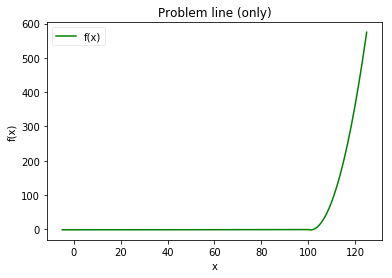

Plot data (2DP)
_____________________________________
X
0.01
-0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-0.0
0.0
0.0
0.0
0.0
0.0
0.0
100.7
100.7
100.78
100.78
100.8
100.88
100.88
100.89
100.89
100.89
100.89
100.89
100.89
100.89
100.89
100.89
100.89
100.89
100.89
100.89
100.89
100.89
100.89


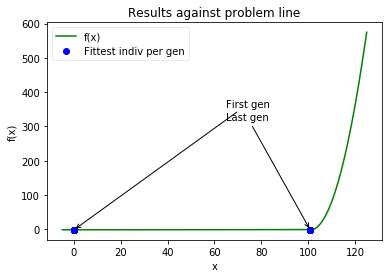

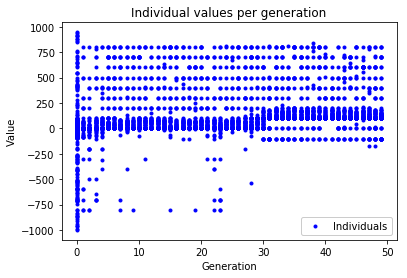

In [209]:
plot_genetic_algorithm_metaheuristic(fitness_function, (-5, 125), ga_results, True)

In [192]:
from batch_plotting import plot_2d_batch_accuracy, plot_3d_batch_accuracy

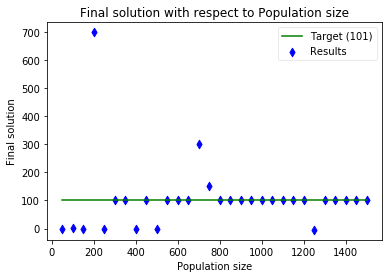

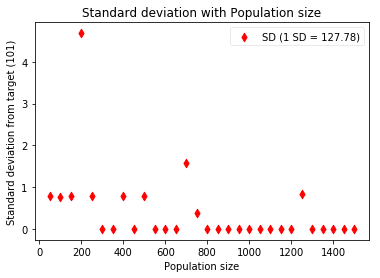

In [211]:
# Batch testing with population size
pop_size_results = []
for ps in range(30):
    pop_size = 50*(ps+1)
    result = genetic_algorithm(pop_size, EPOCHS, FITNESS_UPPER_BOUND, selection_func, CROSS_OVER_AMOUNT, MUTATION_CHANCE, SIGN_CHANGE_CHANCE)
    pop_size_results.append({"x": pop_size, "y": result[1]})

plot_2d_batch_accuracy("Final solution", "Population size", 101, pop_size_results)

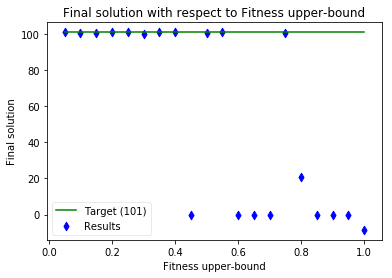

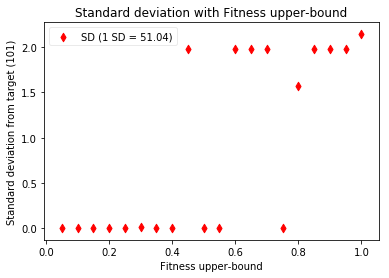

In [213]:
# CHange pop size default to 1000 as it seems more individuals is better from last test.
POP_SIZE = 1000

# Batch testing with fitness upper bound
fub_results = []
for f in range(20):
    fitness_upper_bound = (f+1)*0.05
    result = genetic_algorithm(POP_SIZE, EPOCHS, fitness_upper_bound, selection_func, CROSS_OVER_AMOUNT, MUTATION_CHANCE, SIGN_CHANGE_CHANCE)
    fub_results.append({"x": fitness_upper_bound, "y": result[1]})

plot_2d_batch_accuracy("Final solution", "Fitness upper-bound", 101, fub_results)

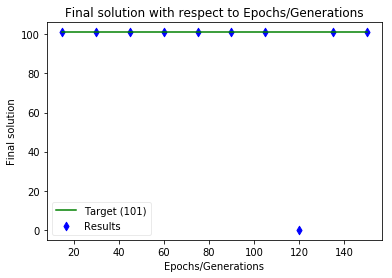

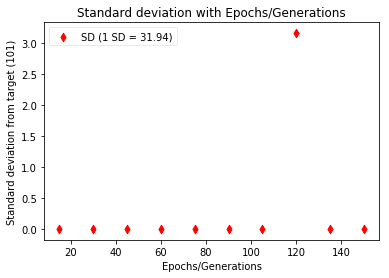

In [217]:
# CHange Fitness upper-bound default to 20% as it seems setting this too high will decrease the effectiveness of the fitness function.
FITNESS_UPPER_BOUND = 0.2

# Batch testing with number of epochs
epoch_results = []
for e in range(10):
    epochs = 15*(e+1)
    result = genetic_algorithm(POP_SIZE, epochs, FITNESS_UPPER_BOUND, selection_func, CROSS_OVER_AMOUNT, MUTATION_CHANCE, SIGN_CHANGE_CHANCE)
    epoch_results.append({"x": epochs, "y": result[1]})

plot_2d_batch_accuracy("Final solution", "Epochs/Generations", 101, epoch_results)

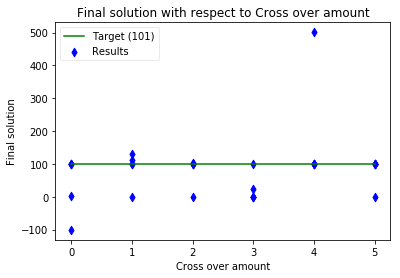

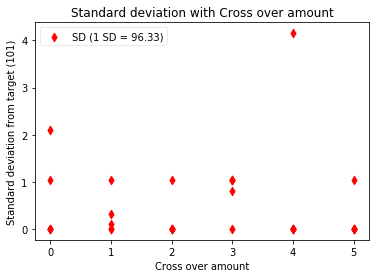

In [251]:
# The number of epochs can be reduced to save on computing power since more doesn't increase the accuracy
EPOCHS = 30

# Batch testing with amount of cross over points
coa_results = []
for cross_over_amount in range(6):
    for i in range(5):
        result = genetic_algorithm(POP_SIZE, EPOCHS, FITNESS_UPPER_BOUND, selection_func, cross_over_amount, MUTATION_CHANCE, SIGN_CHANGE_CHANCE)
        coa_results.append({"x": cross_over_amount, "y": result[1]})

plot_2d_batch_accuracy("Final solution", "Cross over amount", 101, coa_results)

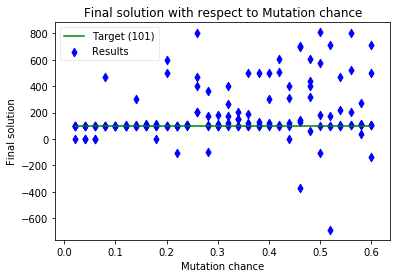

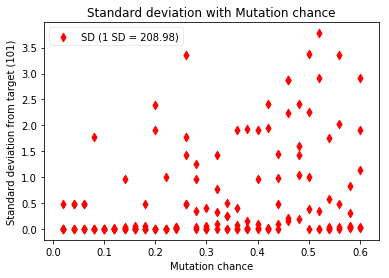

In [221]:
# A high amount 0f cross over tends to create less meaningful values than low crossover
CROSS_OVER_AMOUNT = 1

# Batch testing with mutation chance
mc_results = []
for mc in range(30):
    mutation_chance = 0.02*(1+mc)
    for i in range(5):
        result = genetic_algorithm(POP_SIZE, EPOCHS, FITNESS_UPPER_BOUND, selection_func, CROSS_OVER_AMOUNT, mutation_chance, SIGN_CHANGE_CHANCE)
        mc_results.append({"x": mutation_chance, "y": result[1]})

plot_2d_batch_accuracy("Final solution", "Mutation chance", 101, mc_results)

In [253]:
# Low mutation chance, but not too low (for a bit of diversification) to increase accuracy.
MUTATION_CHANCE = 0.1

def fitness_proportionate_selection(i, population):
    fitnesses = []
    total_fitness = 0 
    for p in population:
        # Changed fitness value into a positive difference from 1000 (highest value in the search space) to make it a maximisation  
        fitness = abs(fitness_function(p.get_value())-1000)
        fitnesses.append(fitness)
        total_fitness += fitness
    individuals = []
    for i in range(2):
        random_number = random.random()
        cumulative_probability = fitnesses[0]/total_fitness
        p = 0
        while (cumulative_probability <= random_number):
            p += 1
            cumulative_probability += fitnesses[p]/total_fitness
        individuals.append(population[p])
    return (individuals[0], individuals[1])

def tournament_selection(i, population):
    PROB = 1/3
    individuals = []
    for i in range(2):
        random_number = random.random()
        cumulative_probability = 0
        for p in range(len(population)):
            cumulative_probability += PROB*(1-PROB)**p
            if (random_number < cumulative_probability):
                individuals.append(population[p])
                break
    return (individuals[0], individuals[1])

GA run through, with default (truncation) selection function.


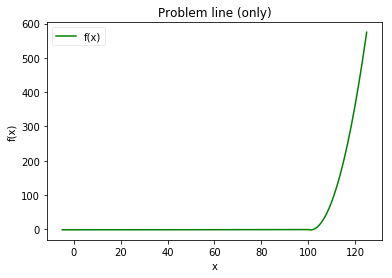

Plot data (2DP)
_____________________________________
X
-0.01
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
101.0
101.0
101.0
101.0
101.0
101.0
101.0
101.0
101.0
101.0
101.0
101.0


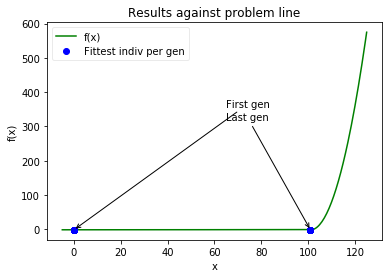

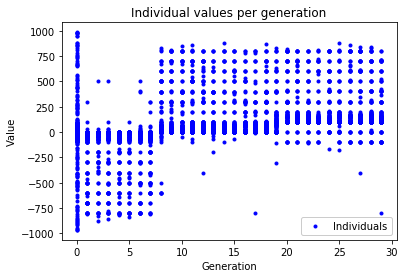

GA run through, with fitness proportionate selection.


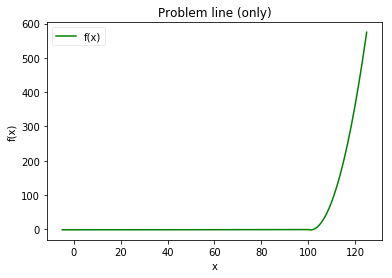

Plot data (2DP)
_____________________________________
X
0.0
0.0
0.0
100.64
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
100.5
100.5
100.6
101.0
101.0
101.0
101.0
101.0
101.0
101.0
101.0
101.0
101.0
101.0
101.0
101.0
101.0


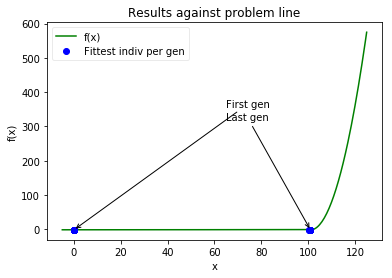

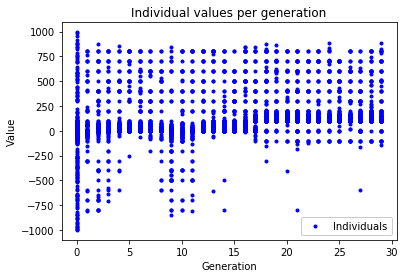

GA run through, with tournament selection; where p=1/3


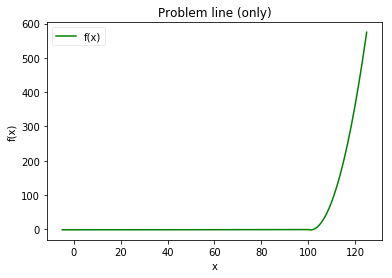

Plot data (2DP)
_____________________________________
X
0.01
100.53
100.8
100.89
100.89
100.89
100.89
100.89
100.89
100.89
100.89
100.89
100.89
100.89
100.89
100.89
100.89
100.89
100.89
101.09
101.0
101.0
101.0
101.0
101.0
101.0
101.0
101.0
101.0
101.0


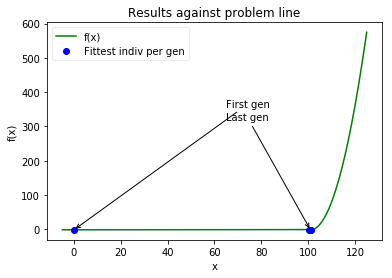

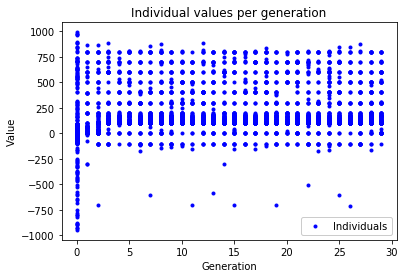

In [254]:
print("GA run through, with default (truncation) selection function.")
regular_ga_results = genetic_algorithm(POP_SIZE, EPOCHS, FITNESS_UPPER_BOUND, selection_func, CROSS_OVER_AMOUNT, MUTATION_CHANCE, SIGN_CHANGE_CHANCE)
plot_genetic_algorithm_metaheuristic(fitness_function, (-5, 125), fps_ga_results, True)

print("GA run through, with fitness proportionate selection.")
fps_ga_results = genetic_algorithm(POP_SIZE, EPOCHS, FITNESS_UPPER_BOUND, fitness_proportionate_selection, CROSS_OVER_AMOUNT, MUTATION_CHANCE, SIGN_CHANGE_CHANCE)
plot_genetic_algorithm_metaheuristic(fitness_function, (-5, 125), fps_ga_results, True)

print("GA run through, with tournament selection; where p=1/3")
fps_ga_results = genetic_algorithm(POP_SIZE, EPOCHS, FITNESS_UPPER_BOUND, tournament_selection, CROSS_OVER_AMOUNT, MUTATION_CHANCE, SIGN_CHANGE_CHANCE)
plot_genetic_algorithm_metaheuristic(fitness_function, (-5, 125), fps_ga_results, True)